In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
x = data[['BMI','Smoking','Sex','Diabetic','KidneyDisease']]
x

,BMI,Smoking,Sex,Diabetic,KidneyDisease
0,16.60,Yes,Female,Yes,No
1,20.34,No,Female,No,No
2,26.58,Yes,Male,Yes,No
3,24.21,No,Female,No,No
4,23.71,No,Female,No,No
...,...,...,...,...,...
319790,27.41,Yes,Male,Yes,No
319791,29.84,Yes,Male,No,No
319792,24.24,No,Female,No,No
319793,32.81,No,Female,No,No


In [5]:
y = data['HeartDisease']
y

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

In [6]:
data_fs = pd.concat([x,y], axis=1)
data_fs

,BMI,Smoking,Sex,Diabetic,KidneyDisease,HeartDisease
0,16.60,Yes,Female,Yes,No,No
1,20.34,No,Female,No,No,No
2,26.58,Yes,Male,Yes,No,No
3,24.21,No,Female,No,No,No
4,23.71,No,Female,No,No,No
...,...,...,...,...,...,...
319790,27.41,Yes,Male,Yes,No,Yes
319791,29.84,Yes,Male,No,No,No
319792,24.24,No,Female,No,No,No
319793,32.81,No,Female,No,No,No


In [7]:
le = preprocessing.LabelEncoder()

In [8]:
data_fs['Smoking'] = le.fit_transform(data_fs['Smoking'])
data_fs['Sex'] = le.fit_transform(data_fs['Sex'])
data_fs['Diabetic'] = le.fit_transform(data_fs['Diabetic'])
data_fs['KidneyDisease'] = le.fit_transform(data_fs['KidneyDisease'])
data_fs['HeartDisease'] = le.fit_transform(data_fs['HeartDisease'])

In [9]:
data_fs

,BMI,Smoking,Sex,Diabetic,KidneyDisease,HeartDisease
0,16.60,1,0,2,0,0
1,20.34,0,0,0,0,0
2,26.58,1,1,2,0,0
3,24.21,0,0,0,0,0
4,23.71,0,0,0,0,0
...,...,...,...,...,...,...
319790,27.41,1,1,2,0,1
319791,29.84,1,1,0,0,0
319792,24.24,0,0,0,0,0
319793,32.81,0,0,0,0,0


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

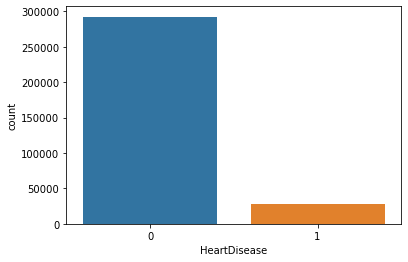

In [10]:
sns.countplot(x=data_fs['HeartDisease'], data=data_fs)

In [11]:
data_yes = data_fs[data_fs['HeartDisease'] == 1]
data_no = data_fs[data_fs['HeartDisease'] == 0]

In [12]:
num_samples = len(data_yes)
df_no_sampled = data_no.sample(num_samples)

In [13]:
data_balanced = pd.concat([data_yes, df_no_sampled])

In [14]:
data_balanced

,BMI,Smoking,Sex,Diabetic,KidneyDisease,HeartDisease
5,28.87,1,0,0,0,1
10,34.30,1,1,2,0,1
35,32.98,1,1,2,0,1
42,25.06,0,0,2,0,1
43,30.23,1,0,2,1,1
...,...,...,...,...,...,...
176684,42.22,0,1,1,0,0
260202,26.29,1,1,0,0,0
205368,39.37,0,1,0,1,0
158920,24.41,0,1,0,0,0


In [15]:
data_balanced.duplicated().sum()

38327

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

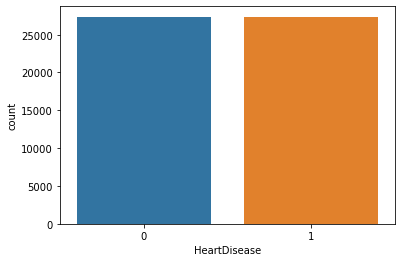

In [16]:
sns.countplot(x = data_balanced['HeartDisease'], data=data_balanced)

In [17]:
data_balanced = data_balanced.sample(frac=1, random_state=42)

In [18]:
data_balanced.isnull().sum()

BMI              0
Smoking          0
Sex              0
Diabetic         0
KidneyDisease    0
HeartDisease     0
dtype: int64

In [19]:
x = data_balanced.iloc[:, 0:5].values
x

array([[37.93,  1.  ,  1.  ,  2.  ,  0.  ],
       [22.86,  0.  ,  0.  ,  2.  ,  0.  ],
       [34.3 ,  0.  ,  1.  ,  0.  ,  0.  ],
       ...,
       [24.02,  1.  ,  0.  ,  0.  ,  0.  ],
       [23.49,  1.  ,  1.  ,  2.  ,  0.  ],
       [23.06,  0.  ,  1.  ,  2.  ,  0.  ]])

In [20]:
y = data_balanced.iloc[:, 5].values
y

array([1, 1, 1, ..., 0, 1, 1])

In [21]:
numeric_features = data[['BMI','Smoking','Sex','Diabetic','KidneyDisease']]

In [22]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 156231 to 183941
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BMI            54746 non-null  float64
 1   Smoking        54746 non-null  int32  
 2   Sex            54746 non-null  int32  
 3   Diabetic       54746 non-null  int32  
 4   KidneyDisease  54746 non-null  int32  
 5   HeartDisease   54746 non-null  int32  
dtypes: float64(1), int32(5)
memory usage: 1.9 MB


In [23]:
scaler = StandardScaler()

In [24]:
x = scaler.fit_transform(x)

In [25]:
x

array([[ 1.41115094,  1.02134342,  0.94738722,  1.78760296, -0.28810922],
       [-0.91619886, -0.9791026 , -1.05553461,  1.78760296, -0.28810922],
       [ 0.85054843, -0.9791026 ,  0.94738722, -0.56272454, -0.28810922],
       ...,
       [-0.73705316,  1.02134342, -1.05553461, -0.56272454, -0.28810922],
       [-0.81890421,  1.02134342,  0.94738722,  1.78760296, -0.28810922],
       [-0.88531167, -0.9791026 ,  0.94738722,  1.78760296, -0.28810922]])

In [26]:
y

array([1, 1, 1, ..., 0, 1, 1])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
def compare_classifiers(x_train, x_test, y_train, y_test):
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "SVM": SVC(),
        "Naive Bayes": GaussianNB(),
        "Logistic Regression": LogisticRegression()
    }
    
    results = {}
    for classifier_name, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[classifier_name] = accuracy
    
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    classifiers_names, accuracies = zip(*sorted_results)
    
    plt.figure(figsize=(10, 6))
    plt.bar(classifiers_names, accuracies)
    plt.ylim([0, 1])
    plt.xticks(rotation=45)
    plt.xlabel("Classifier")
    plt.ylabel("Accuracy")
    plt.title("Comparison of Classifiers")
    plt.show()

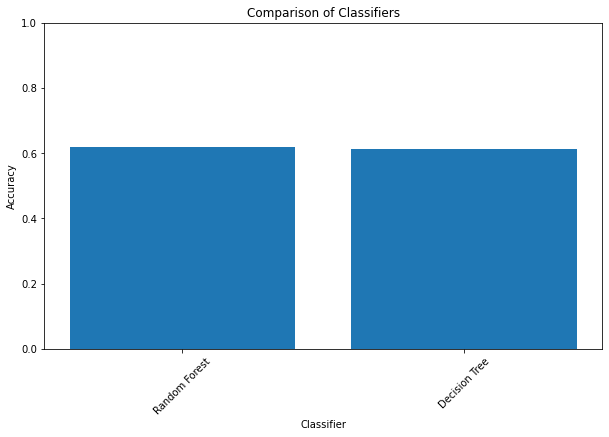

In [29]:
compare_classifiers(x_train, x_test, y_train, y_test)